# Visualization of the task solved by a RL agent

In [1]:
from utils_lib.utils import Utils

import random
import numpy as np


import matplotlib.pyplot as plt
utils = Utils()



rewards_tab = []
r_epi = []

def register_reward(input,_):
    # print("---")
    # print(input)
    val =input['rewards'][0]
    r_epi.append(val)

    if input["dones"][0]:
        rewards_tab.append(np.sum(r_epi)/len(r_epi))
        r_epi.clear()





def get_model_and_env(env_j,policie_i,fe_k,fev_l):
    if not(utils.compatible_env_policie(policie_i,env_j)):
        print("not compatible")

    policie =      utils.all_policies[policie_i]["policie"]
    policie_name = utils.all_policies[policie_i]["name"]

    compute_opti = utils.all_policies[policie_i]["compute_opti"]
    compute_opti = "cpu"
    env =          utils.all_envs[env_j]["env"]
    env_name =     utils.all_envs[env_j]["name"]
    if len(utils.all_feature_extractor) <= fe_k:
        print(len(utils.all_feature_extractor))
        print("bad fe {}".format(fe_k))
    feature_extract = utils.all_feature_extractor[fe_k]
    if len(feature_extract["order"]) <= fev_l:
        print("bad fev {}".format(fev_l))

    feature_extract_name = feature_extract["name"]
    feature_order = feature_extract["order"][fev_l]
    feature_obs_shape = feature_extract["obs_shape"]


    env = utils.get_env(env,env_j,feature_obs_shape)

    policy_kwargs = utils.get_fe_kwargs(env,feature_extract,feature_order,compute_opti)
    if policy_kwargs is not None:
        model = policie(
            policy="MlpPolicy",
            #learning_rate = old_lr,
            env=env,
            policy_kwargs = policy_kwargs,
            device=compute_opti,
            verbose=1,
            #seed=random.randint(100,100000),
            )
    return model,env

# Train the RL agent

none
cpu
Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.783    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 2955     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2279     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.58     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 3169     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4422     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.369    |
| time/               |          |
|    episodes         | 300      |
|    fps              | 3113     |
|    time_elapsed     | 2        |
|    total_timesteps  | 6641     |
----------------------------------
-----------------------------

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2600     |
|    fps              | 2440     |
|    time_elapsed     | 22       |
|    total_timesteps  | 54582    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000639 |
|    n_updates        | 1145     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2700     |
|    fps              | 2354     |
|    time_elapsed     | 23       |
|    total_timesteps  | 55603    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000128 |
|    n_updates        | 1400     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4500     |
|    fps              | 1470     |
|    time_elapsed     | 54       |
|    total_timesteps  | 79530    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000712 |
|    n_updates        | 7382     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4600     |
|    fps              | 1431     |
|    time_elapsed     | 57       |
|    total_timesteps  | 82584    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000319 |
|    n_updates        | 8145     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

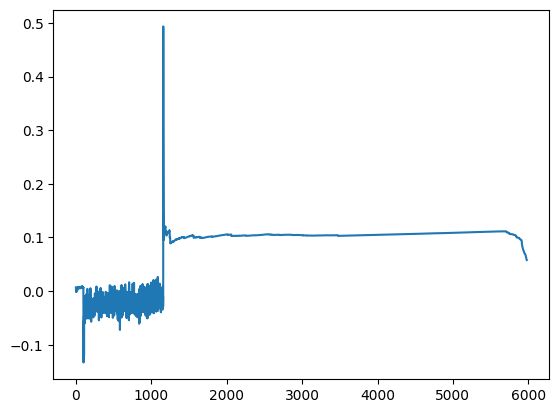

In [16]:
#Environements :

#0 : Ant-v4
#1 : HalfCheetah-v4
#2 : Hopper-v3
#3 : HumanoidStandup-v4
#4 : Humanoid-v4
#5 : InvertedDoublePendulum-v2
#6 : InvertedPendulum-v4
#7 : Reacher-v4
#8 : Swimmer-v4
#9 : Walker2d-v3
#10 : Acrobot-v1
#11 : CartPole-v1
#12 : MountainCarContinuous-v0
#13 : MountainCar-v0
#14 : Pendulum-v1
#15 : BipedalWalker-v3
#16 : LunarLander-v2

#Policies :

#0 : A2C
#1 : DDPG
#2 : DQN
#3 : PPO
#4 : SAC
#5 : TD3

model, env = get_model_and_env(11,2,0,0)#(env,policie,feature_extraction,feature_extraction_variant)

model.learn(
    total_timesteps=10000, 
    log_interval=100,
    callback=register_reward
    )

plt.plot(rewards_tab)
plt.show()


# Watch the result

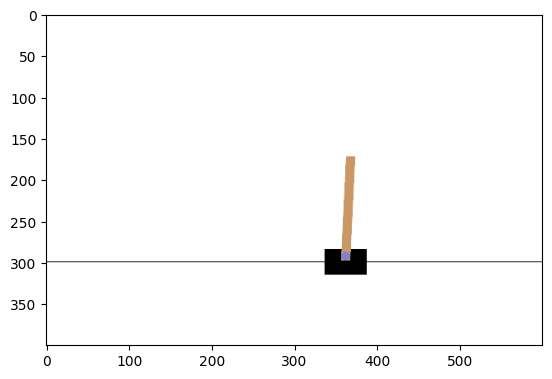

In [17]:

from gym import wrappers
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output


#model, env = get_model_and_env(8,3,0,0)

obs = env.reset()

for i in range(1000):


    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    if i%3==0:
        clear_output(wait=True)
        plt.imshow( env.render(mode='rgb_array') )
        plt.show()
    #env.render()


